In [ ]:
# Ensemble Learning : Combining predictions from competing models often gives better predictive accuracy than individual models.
# Random Forest is a bagging algorithm. Bagging = Bootstrapping + Aggregating
# In summary, you are trying to use variants of the original data to train a model.
# Suppose your original data is : 1-2-3-4-5-6-7-8-9-10
# In each bootstrap you will randomly choose from the original data
# Bootstrap1 : 1-4-5-2-6-5-4-4-2. You dont need to have a unique data in bootstraps.
# Bootstrap2 : 9-5-2-4-2-3-6-7-8. and bootstratps goes like this.
# Let your trainin data be D. Then you create k bootstrap samples by selecting random samples with REPLACEMENT from D.
# Then train model on each bootstrap sample.
# Vote or average the predictions of the k models. 
# A particular training data has a probability of 1-1/n of not being picked. n is the size of bootstrap.
# Thus it is probability of ending up in the test data(not selected) is (1-1/n)**n = 0.368
# This means training data will containt approximately %63.2 of the initial instances.

# WHY DO ENSEMBLES WORK ?
# Suppose you have 21 base classifiers with p = 0.7 . Independent and have equal weight of vote. Probability that ensemble classifier makes a correct predictions is : combination(21 i)*p**i*(1-p)**(21-i) = 0.97
# AS long as the base classifier is better than random (error < 0.5),ensemble will be superior to base classifier.
# If error is >0.5 then it predicts wrong with more confident.

# If we go back and think about bagging again:
# Create multiple variants of training data D : d1,d2,d3....,dt then build multiple predictive models c1,....,ct and then combine predictions.
# If there is high variation in the data, it works pretty well.
# Bagging is especiallt useful for models with high variance and noisy data.
# High variance models : models whose prediction accuracies varies a lot across different data sets.
# In general, the type of base classifiers be same. Unstable classifiers like DecisionTree are uses. More stable models like SVM,logistic regression are not used as base classifier.
# Out of Bag Error Estimation : Can make use of the out of bag examples for validation set.
# Examples that are not chosen for the bootstraps become a validation data for each bootstraps if you want to use out of bag error estimation. You should choose oob_score = True in the model.
# If you won't compare the results of the model with others, then you can use oob_score for validation data.

# Random Forest is a special bagging model. Specifically designed for decision trees.
# There can be situations where we usually learn the same or very similar classifier. Averaging over these classifiers do not help therefore you need to introduce extra variation inl earner.
# Therefore, you can add more randomness on both dataset and feature selections for each bootstraps.
# Fix m <= M where M is the number of features.
# Method 1 : Choose m features randomly, compute their information gain or gini index and choose the attribute with the large information gain or gini index.
# By choosing these features randomly, you are starting to promote of having different decision trees.
# Method 2 : Compute the information gain or gini index of all M attributes. Select top m attributes by information gain and randomly select one of the m attributes as splitting node.
# There are two sources of randomness.
# Bootstrapping : Each tree is grown using a random sample of the data.
# Averaging : Combining the average of the predictions of each classifier. These two processes are called as bagging together.
# Random feature vectors: At each node, best split is chosen from a random sample of m attributes instead of all attributes.
# If you use regression than you get the average of predictions, otherwise you use majority voting or soft voting or etc.
# In general m is chosen as sqrt(M).
# You can check the variable importance in random forest. Variable importance is computed using the mean decrease in Gini index and expressed relative to the maximum.
# Important hyperparameters : 
# n_estimators : Indicates the number of decision trees we intend to use. Generally the higher the number of trees, the more accurate will our model be.
# max_features : This helps in increasing the accuracy of model. It is the maximum number of features to consider when splitting a node.
# Advantages : Can handle missing values and anomalies well, are generally good with large dataset, normally prevent overfitting, can handle classification and regression problems.

# Price : mode computation per prediction.






In [1]:
!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset") # download data from kaggle datasets

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: uguryigit34
Your Kaggle Key: ········


100%|█████████████████████████████████████████| 742k/742k [00:00<00:00, 982kB/s]

In [96]:
import pandas as pd
import seaborn as sns
from sklearn import model_selection as mod
from sklearn import metrics as met
from sklearn import preprocessing as pre
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
data = pd.read_csv("/Users/uguryigit/cardiovascular-disease-dataset/cardio_train.csv",delimiter = ";")

In [8]:
data.drop("id",axis = 1,inplace = True)

In [10]:
data.cardio.value_counts() # balanced dataset.

0    35021
1    34979
Name: cardio, dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [12]:
X = data.drop(["cardio"],axis = 1)
y = data["cardio"].values


In [14]:
X_train,X_test,y_train,y_test = mod.train_test_split(X,y,test_size = 0.2,stratify = y,random_state = 20)

In [16]:
def generate_one_hot_vector(df): # one hot encoding for categorical features. 
    df = pd.get_dummies(df,columns = ["gender"],drop_first = True) 
    df = pd.get_dummies(df,columns = ["cholesterol"],drop_first = True)
    df = pd.get_dummies(df,columns = ["gluc"],drop_first = True)
    
    return df

In [18]:
X_train = generate_one_hot_vector(X_train)
X_test = generate_one_hot_vector(X_test)

In [19]:
X_train

,age,height,weight,ap_hi,ap_lo,smoke,alco,active,gender_2,cholesterol_2,cholesterol_3,gluc_2,gluc_3
18577,18348,164,72.0,140,90,0,0,1,0,1,0,0,0
15404,21694,178,80.0,150,90,0,0,1,1,0,0,0,0
4321,18756,160,75.0,110,80,0,0,0,0,0,0,0,0
55155,16786,170,92.0,125,85,0,0,1,1,0,0,0,0
32626,17490,179,78.0,120,80,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11108,16058,153,56.0,90,60,0,0,1,0,0,0,0,0
63349,19010,168,78.0,110,70,1,0,1,1,0,0,0,0
63155,22112,172,95.0,130,70,0,0,0,0,0,1,0,0
35788,22709,164,67.0,150,90,0,0,1,0,0,0,0,0


In [22]:
dtc = DecisionTreeClassifier(random_state = 20) 
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=20)

[Text(306.90000000000003, 317.09999999999997, 'ap_hi <= 128.5\ngini = 0.5\nsamples = 56000\nvalue = [28017, 27983]'),
 Text(153.45000000000002, 190.26, 'age <= 19961.5\ngini = 0.433\nsamples = 33017\nvalue = [22533, 10484]'),
 Text(76.72500000000001, 63.420000000000016, '\n  (...)  \n'),
 Text(230.175, 63.420000000000016, '\n  (...)  \n'),
 Text(460.35, 190.26, 'ap_hi <= 138.5\ngini = 0.363\nsamples = 22983\nvalue = [5484, 17499]'),
 Text(383.62500000000006, 63.420000000000016, '\n  (...)  \n'),
 Text(537.075, 63.420000000000016, '\n  (...)  \n')]

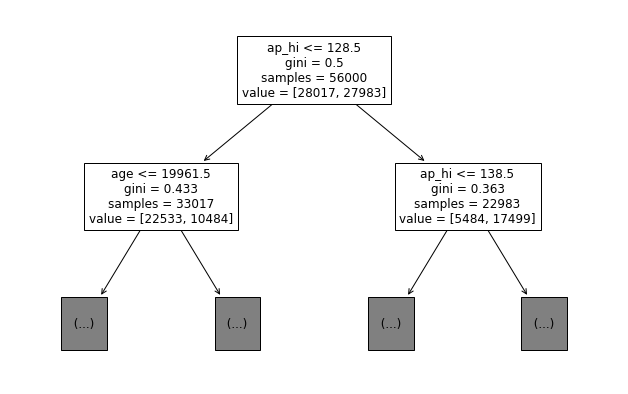

In [25]:
plt.figure(figsize = (11,7))
tree.plot_tree(dtc,max_depth = 1, feature_names = X_train.columns)

In [26]:
pred = dtc.predict(X_test)

In [28]:
print("Accuracy of Decision Tree: ", met.accuracy_score(y_test,pred))

Accuracy of Decision Tree:  0.6327857142857143


In [29]:
#### BAGGING CLASSIFIER

In [33]:
bc = BaggingClassifier(random_state = 20)
bc.fit(X_train,y_train)

BaggingClassifier(random_state=20)

In [34]:
pred = bc.predict(X_test)

In [35]:
print("Accuracy of Bagging Classifier : ", met.accuracy_score(y_test,pred))

Accuracy of Bagging Classifier :  0.695


In [36]:
bc = BaggingClassifier(oob_score = True,random_state = 20) # out of bag score


In [37]:
bc.fit(X_train,y_train)

/Users/uguryigit/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:640: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/uguryigit/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:644: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = (predictions /


BaggingClassifier(oob_score=True, random_state=20)

In [38]:
print("OOB Score: ", bc.oob_score_)

OOB Score:  0.6595892857142858


In [39]:
##### Random Forest Classifier

In [40]:
rfc = RandomForestClassifier(random_state = 20)

In [41]:
rfc.fit(X_train,y_train) # n_estimators are default as 20.
len(rfc.estimators_)

100

In [46]:
rfc.estimators_[1] # Uses decision trees as classifiers.

DecisionTreeClassifier(max_features='auto', random_state=1663920602)

In [50]:
print(met.accuracy_score(y_test,pred))

0.695


In [51]:
rfc = RandomForestClassifier(random_state = 20,oob_score = True)

In [52]:
rfc.fit(X_train,y_train) #min_samples_leaf = 1. If sample count is less than min_samples_leaf at the node then do not split anymore and take it as a leaf node. It can be used to solve the overfitting problem.
#The main difference between min samples leaf and min samples split is that min_samples_leaf guarantees a minimum number of samples in a leaf, while min_samples_split can create arbitrary small leaves, though min_samples_split is more common in the literature.


RandomForestClassifier(oob_score=True, random_state=20)

In [53]:
print("OOB Score: ", rfc.oob_score_)

OOB Score:  0.7130178571428571


In [54]:
pred = rfc.predict(X_train)

In [56]:
print(met.accuracy_score(y_train,pred)) # creates overfitting.

0.9998392857142857


In [57]:
pred = rfc.predict(X_test)

In [58]:
print(met.accuracy_score(y_test,pred))

0.7095


In [59]:
rfc = RandomForestClassifier(min_samples_leaf = 5,random_state = 20,oob_score = True)
rfc.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=5, oob_score=True, random_state=20)

In [60]:
pred = rfc.predict(X_train)
print(met.accuracy_score(y_train,pred))

0.792125


In [61]:
print(rfc.oob_score_)

0.7338035714285714


In [63]:
pred = rfc.predict(X_test)
print(met.accuracy_score(y_test,pred))

0.7324285714285714


In [64]:
rfc = RandomForestClassifier(n_estimators = 2000,max_depth = 3,random_state = 20,oob_score = True)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=2000, oob_score=True,
                       random_state=20)

In [65]:
pred = rfc.predict(X_test)
print(met.accuracy_score(y_test,pred))

0.7209285714285715


In [66]:
#### HyperParameter Optimization

In [82]:
n_estimators = [5,10,50,100,250,500,750,1000]

oob_scores = []

In [84]:
for n_estimator in n_estimators:
    rfc = RandomForestClassifier(n_estimators = n_estimator,random_state = 20, min_samples_leaf = 5,oob_score = True)
    rfc.fit(X_train,y_train)
    print("OOB Score: ", rfc.oob_score_," for n_estimator = ", n_estimator)
    oob_scores.append(rfc.oob_score_)

/Users/uguryigit/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/uguryigit/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


OOB Score:  0.685625  for n_estimator =  5


/Users/uguryigit/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/uguryigit/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


OOB Score:  0.7184821428571428  for n_estimator =  10
OOB Score:  0.7338214285714286  for n_estimator =  50
OOB Score:  0.7338035714285714  for n_estimator =  100
OOB Score:  0.7346071428571429  for n_estimator =  250
OOB Score:  0.7348214285714286  for n_estimator =  500
OOB Score:  0.735625  for n_estimator =  750
OOB Score:  0.735375  for n_estimator =  1000


/var/folders/pm/r8b8p4xs2w119xjf2kgl1_1r0000gn/T/ipykernel_74389/1078600640.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  graph.set_xticklabels(n_estimators)# you can decide about the number of estimators needed.


[Text(0.1, 0, '5'),
 Text(1.0, 0, '10'),
 Text(10.0, 0, '50'),
 Text(100.0, 0, '100'),
 Text(1000.0, 0, '250'),
 Text(10000.0, 0, '500'),
 Text(100000.0, 0, '750')]

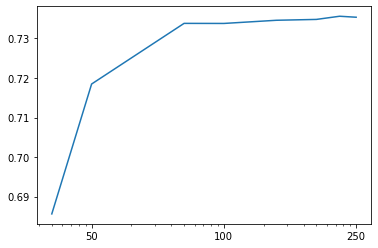

In [85]:
graph = sns.lineplot(x = n_estimators, y=oob_scores)

graph.set(xscale = "log") 

graph.set_xticklabels(n_estimators)# you can decide about the number of estimators needed.

In [ ]:
# Default max feature size is sqrt(number of features). This is an another hyperparameter and we can change it.

In [87]:
max_features = [3,6,9,X_train.shape[1]]

for max_feature in max_features:
    rfc = RandomForestClassifier(random_state = 20, oob_score = True, n_estimators = 250, max_features = max_feature, min_samples_leaf = 5) # min_samples_leaf'de senin kaç tane datan var onla alakalı aslında.
    rfc.fit(X_train,y_train)
    
    print("OOB Score : ", rfc.oob_score_ , " for max _ features = ", max_feature)
    
# If you use all features then it becomes same as baggin classifier which is not meaningful.
# 3 is chosen as the best option.

OOB Score :  0.7346071428571429  for max _ features =  3
OOB Score :  0.7308214285714286  for max _ features =  6
OOB Score :  0.7270714285714286  for max _ features =  9
OOB Score :  0.7255535714285715  for max _ features =  13


In [89]:
rfc = RandomForestClassifier(n_estimators = 250,random_state = 7, min_samples_leaf = 5, max_features = 3)

In [104]:
rfc.fit(X_train,y_train)

pred = rfc.predict(X_test)

print("Accuracy Score on Test Data: ", met.accuracy_score(y_test,pred))

Accuracy Score on Test Data:  0.7337857142857143


In [105]:
met.confusion_matrix(y_test,pred)

array([[5427, 1577],
       [2150, 4846]])

In [118]:
met.roc_auc_score(y_test,rfc.predict_proba(X_test)[:,1])

0.796554923364873

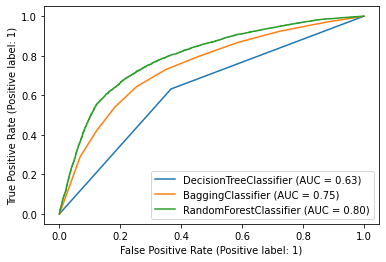

In [111]:
fig,ax = plt.subplots() # Compare different algorithms.

met.plot_roc_curve(dtc,X_test,y_test,ax=ax)
met.plot_roc_curve(bc,X_test,y_test,ax=ax)
met.plot_roc_curve(rfc,X_test,y_test,ax=ax)

Text(0.5, 0, 'Importance')

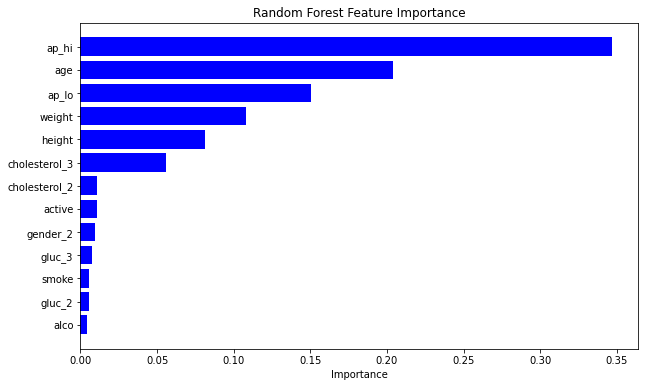

In [97]:
features = X_train.columns # FEATURE IMPORTANCE ACCORDING TO GINI.

importances = rfc.feature_importances_ 

indices = np.argsort(importances)

plt.figure(figsize = (10,6))
plt.title("Random Forest Feature Importance")
plt.barh(range(len(indices)),importances[indices],color = "b",align = "center") 

plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel("Importance")